<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/Proyecto_Unidad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de resultados GUESS - Minecraft

##Carga de librerías

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
sns.set(style='whitegrid')

##Carga de dataset

In [76]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/guess_proyecto3_datos.xlsx"
df = pd.read_excel(url, skiprows=10)
df.head()

,user_id,version,AE1,AE2,AE3,AE4,PE1,PE2,PE3,PE4,...,US2,US3,US4,US5,US6,US7,VA1,VA2,VA3,VA4
0,user_1,v1,5,5,4,3,4,5,5,5,...,4,4,5,6,3,6,4,5,5,4
1,user_2,v1,5,7,4,4,5,5,4,5,...,4,3,4,3,5,4,4,5,3,4
2,user_3,v1,6,5,4,4,6,5,5,5,...,7,5,4,5,5,3,2,5,5,5
3,user_4,v1,5,4,5,6,5,6,4,4,...,6,6,5,3,5,3,6,4,4,4
4,user_5,v1,5,4,3,5,4,4,5,5,...,3,3,5,5,4,4,4,4,5,5


In [77]:
# Diccionario con columnas por subdimensión
subdimensiones = {
    "Aesthetics": ["AE1", "AE2", "AE3", "AE4"],
    "Play Engrossment": ["PE1", "PE2", "PE3", "PE4", "PE5", "PE6", "PE7"],
    "Enjoyment": ["EN1", "EN2", "EN3", "EN4", "EN5", "EN6"],
    "Personal Gratification": ["PG1", "PG2", "PG3", "PG4"],
    "Creative Freedom": ["CF1", "CF2", "CF3", "CF4"],
    "Social Connectivity": ["SC1", "SC2", "SC3", "SC4", "SC5"],
    "Narrative": ["NA1", "NA2", "NA3", "NA4"],
    "Usability/Playability": ["US1", "US2", "US3", "US4", "US5", "US6", "US7"],
    "Visual Aesthetics": ["VA1", "VA2", "VA3", "VA4"]
}

# Crear un nuevo DataFrame con promedios
#df_promedios = pd.DataFrame()
df_promedios = df[["version","user_id"]].copy()
df_promedios = df_promedios.rename(columns={"user_id": "usuario"})

for subdim, cols in subdimensiones.items():
    # Verifica que todas las columnas existan antes de promediar
    if all(c in df.columns for c in cols):
        df_promedios[subdim] = df[cols].mean(axis=1)
    else:
        print(f"Alerta: Faltan columnas en {subdim}")

df_promedios.head()
df = df_promedios
#df = df_promedios
# Mostrar los primeros resultados
#print(df_promedios.head())


##Cálculo de los promedios de las subescalas GUESS por versión del juego

In [78]:
mean_scores = df.drop(columns='usuario').groupby('version').mean(numeric_only=True).reset_index()
mean_scores

,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,Visual Aesthetics
0,v1,4.525,4.528571,4.380000,4.46,5.03,4.472,4.425,4.454286,4.405
1,v2,4.895,4.920000,4.823333,4.81,5.02,4.864,4.840,4.842857,4.815


##Gráfico de barras agrupadas por subescala

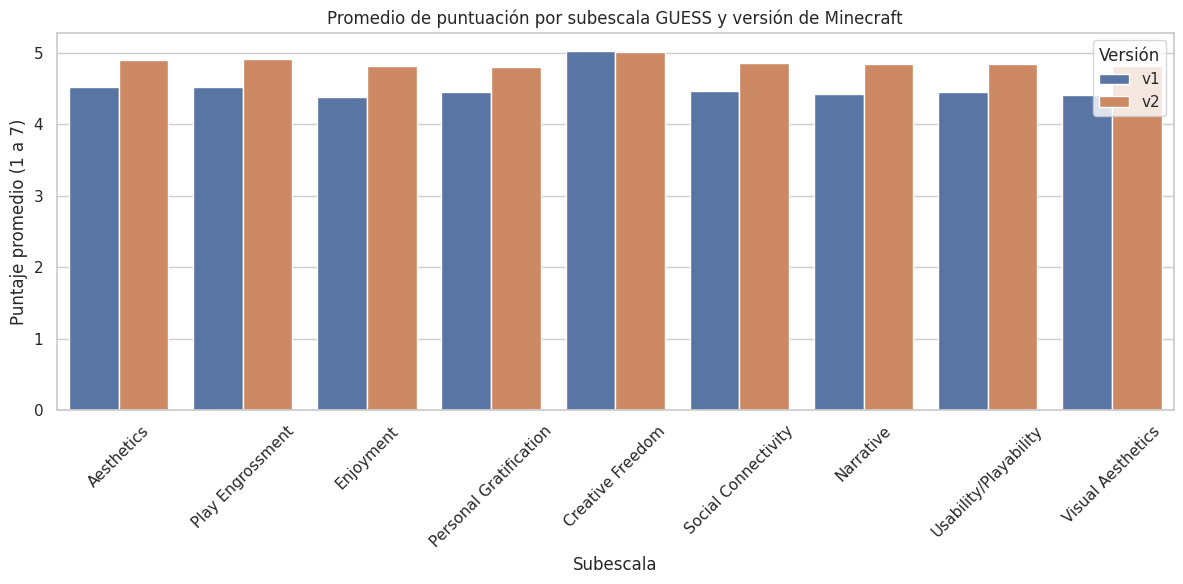

In [79]:
# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio de puntuación por subescala GUESS y versión de Minecraft')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

##Gráfico de Radar por subescala

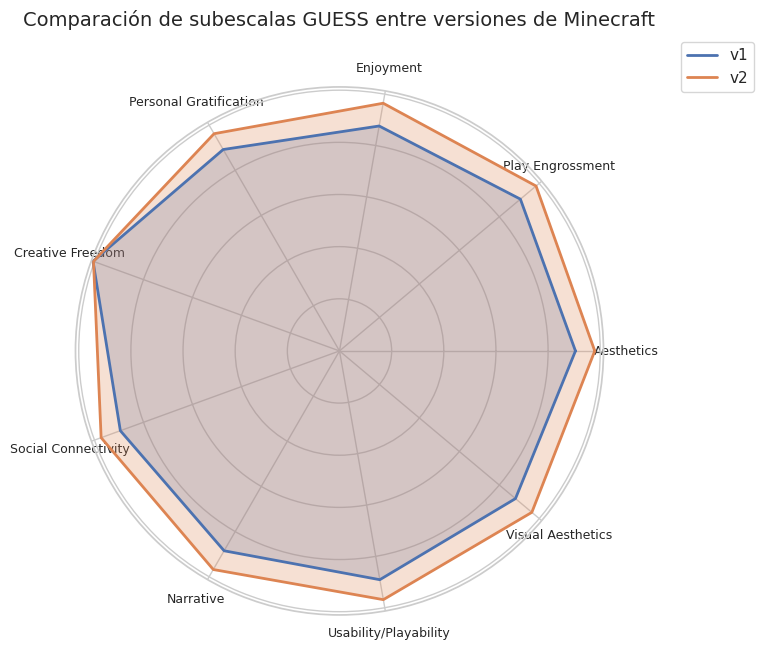

In [80]:
# Radar chart comparativo con todas las versiones (con área rellena)
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar cada línea con su área rellena
for i, row in mean_scores.iterrows():
    stats = row[1:].tolist()
    stats += stats[:1]
    ax.plot(angles, stats, label=row['version'], linewidth=2)
    ax.fill(angles, stats, alpha=0.25)  # área bajo la curva

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticklabels([])
ax.set_title('Comparación de subescalas GUESS entre versiones de Minecraft', size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


# Otras visualizaciones posibles

Además de los gráficos de barras y el gráfico radial, existen otras formas útiles de visualizar la información recolectada. Estas visualizaciones son complementarias y ayudan a identificar patrones que podrían no ser evidentes en promedios simples.

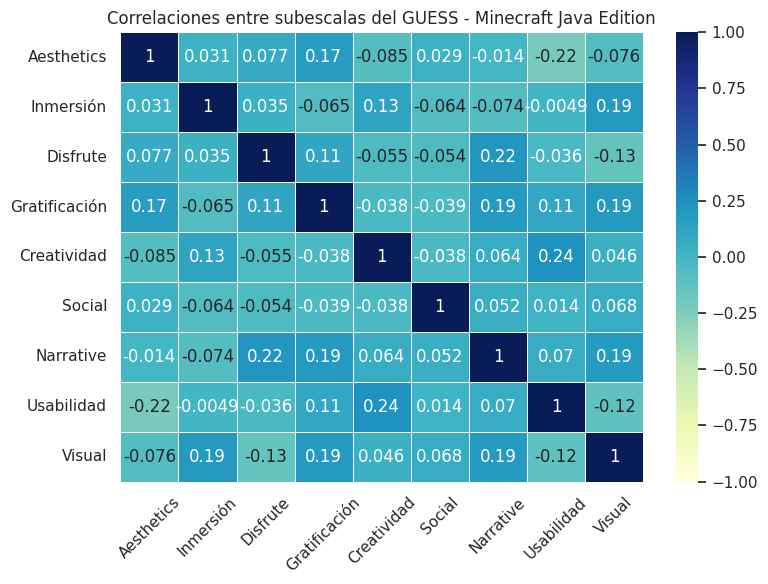

In [81]:
# Filtrar solo Minecraft Java Edition
df_java = df[df['version'] == 'v2'].copy()

# Renombrar columnas para abreviar
abreviaciones = {
    "Audio Aesthetics": "Audio",
    "Creative Freedom": "Creatividad",
    "Enjoyment": "Disfrute",
    "Narratives": "Narrativa",
    "Personal Gratification": "Gratificación",
    "Play Engrossment": "Inmersión",
    "Social Connectivity": "Social",
    "Usability/Playability": "Usabilidad",
    "Visual Aesthetics": "Visual"
}
df_java = df_java.rename(columns=abreviaciones)

# Calcular matriz de correlación
correlation_matrix = df_java.drop(columns=['version', 'usuario']).corr()

# Heatmap con paleta suave
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlaciones entre subescalas del GUESS - Minecraft Java Edition')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



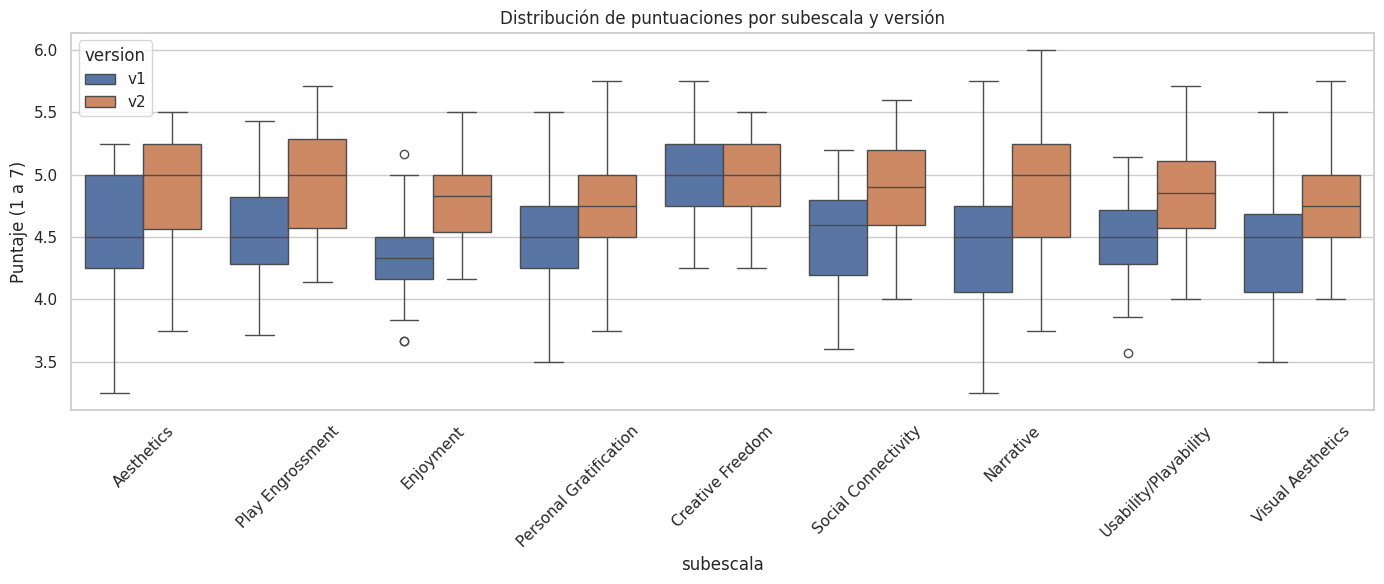

In [82]:
df_melted = df.melt(id_vars=['version', 'usuario'], var_name='subescala', value_name='puntaje')

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x='subescala', y='puntaje', hue='version')
plt.title('Distribución de puntuaciones por subescala y versión')
plt.xticks(rotation=45)
plt.ylabel('Puntaje (1 a 7)')
plt.tight_layout()
plt.show()



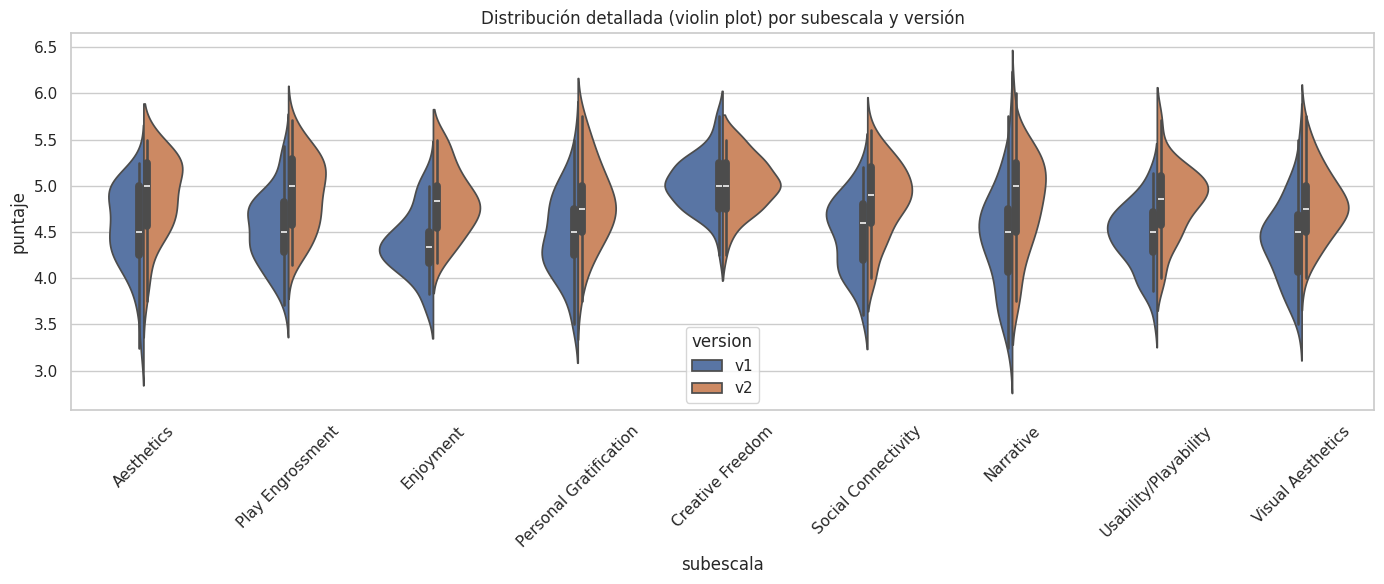

In [83]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_melted, x='subescala', y='puntaje', hue='version', split=True)
plt.title('Distribución detallada (violin plot) por subescala y versión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


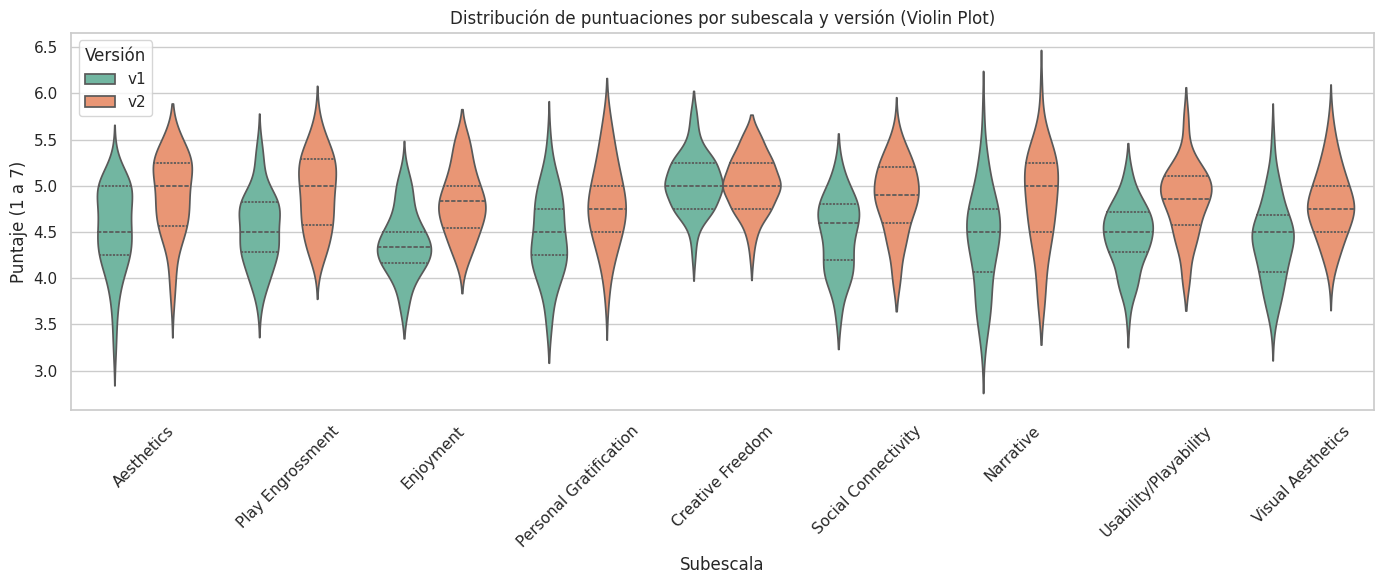

In [84]:
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=df_melted,
    x='subescala',
    y='puntaje',
    hue='version',
    split=False,  # mejor separados
    inner='quartile',  # para mostrar medianas
    palette='Set2'  # colores más amigables
)
plt.title('Distribución de puntuaciones por subescala y versión (Violin Plot)')
plt.xticks(rotation=45)
plt.ylabel('Puntaje (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()


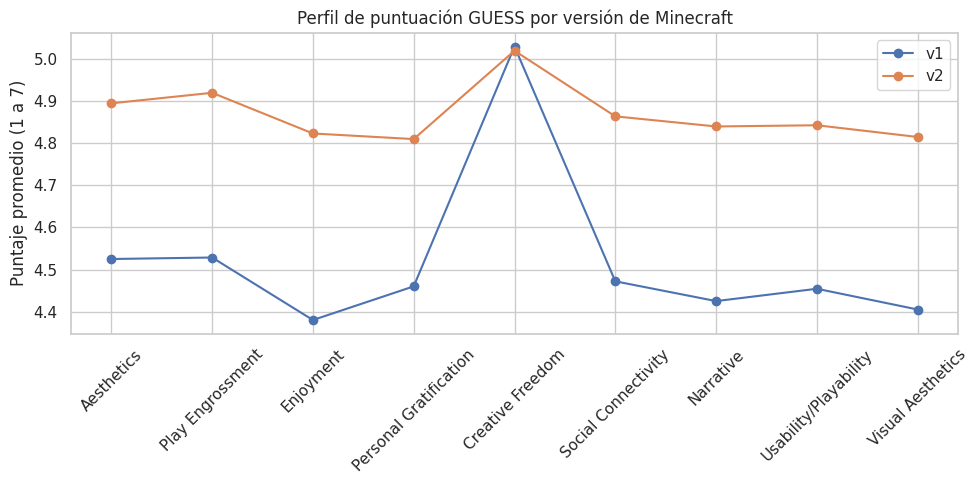

In [85]:
plt.figure(figsize=(10, 5))
for i, row in mean_scores.iterrows():
    plt.plot(mean_scores.columns[1:], row[1:], marker='o', label=row['version'])

plt.title('Perfil de puntuación GUESS por versión de Minecraft')
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
# Lista de métricas (subdimensiones)
metricas = [
    "Aesthetics",
    "Play Engrossment",
    "Enjoyment",
    "Personal Gratification",
    "Creative Freedom",
    "Social Connectivity",
    "Narrative",
    "Usability/Playability",
    "Visual Aesthetics"
]

# Crear lista para almacenar resultados
resultados = []

# Loop para calcular t-test por cada métrica
for metrica in metricas:
    df_v1 = df_promedios[df_promedios['version'] == 'v1'][metrica]
    df_v2 = df_promedios[df_promedios['version'] == 'v2'][metrica]

    # Realizar t-test independiente
    t_stat, p_value = stats.ttest_ind(df_v1, df_v2, nan_policy='omit')

    # Redondear valores a 4 decimales
    t_stat = round(t_stat, 4)
    p_value = round(p_value, 4)

    # Evaluar significancia
    diff_sig = "Yes" if p_value < 0.05 else "No"

    resultados.append({
        "Métrica": metrica,
        "t-statistic": t_stat,
        "p-value": p_value,
        "diff_sig": diff_sig
    })

df_resultados = pd.DataFrame(resultados)

# Convertir resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
print(df_resultados)

                  Métrica  t-statistic  p-value diff_sig
0              Aesthetics      -4.2388   0.0001      Yes
1        Play Engrossment      -4.9896   0.0000      Yes
2               Enjoyment      -6.2847   0.0000      Yes
3  Personal Gratification      -3.8627   0.0002      Yes
4        Creative Freedom       0.1680   0.8670       No
5     Social Connectivity      -4.9611   0.0000      Yes
6               Narrative      -3.9531   0.0001      Yes
7   Usability/Playability      -5.3140   0.0000      Yes
8       Visual Aesthetics      -5.0995   0.0000      Yes
